In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
from collections import defaultdict 

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15, 6)

print("✅ All libraries imported successfully!")



✅ All libraries imported successfully!


In [2]:
# Define root paths
data_root = Path('C:/Users/USER/fruit_veg_mushroom_identifier/data/raw')
fruits_dir = data_root / 'Fruits'
vegetables_dir = data_root / 'Vegetables'
mushrooms_dir = data_root / 'Mushrooms'

# Create output directories if needed
output_dir = Path('./data/processed')
output_dir.mkdir(parents=True, exist_ok=True)

print("📁 Data Paths:")
print(f"  Fruits:     {fruits_dir}")
print(f"  Vegetables: {vegetables_dir}")
print(f"  Mushrooms:  {mushrooms_dir}")
print(f"  Output:     {output_dir}")

# Verify all paths exist
for path, name in [(fruits_dir, 'Fruits'), (vegetables_dir, 'Vegetables'), (mushrooms_dir, 'Mushrooms')]:
    if path.exists():
        print(f"✅ {name} folder found")
    else:
        print(f"❌ {name} folder NOT found") 


📁 Data Paths:
  Fruits:     C:\Users\USER\fruit_veg_mushroom_identifier\data\raw\Fruits
  Vegetables: C:\Users\USER\fruit_veg_mushroom_identifier\data\raw\Vegetables
  Mushrooms:  C:\Users\USER\fruit_veg_mushroom_identifier\data\raw\Mushrooms
  Output:     data\processed
✅ Fruits folder found
✅ Vegetables folder found
✅ Mushrooms folder found


ANALYZE FRUITS DATASET 

In [3]:
print("="*80)
print("🍎 FRUITS DATASET ANALYSIS")
print("="*80)

fruits_data = []

for fruit_class in sorted(os.listdir(fruits_dir)):
    class_path = fruits_dir / fruit_class
    
    if not class_path.is_dir():
        continue
    
    # Count images
    images = [f for f in os.listdir(class_path) 
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    fruits_data.append({
        'class': fruit_class,
        'count': len(images)
    })
    
    print(f"  {fruit_class:30s}: {len(images):4d} images")

# Create DataFrame
df_fruits = pd.DataFrame(fruits_data)
print(f"\nTotal: {df_fruits['count'].sum()} images / {len(df_fruits)} classes")
print(f"Average per class: {df_fruits['count'].mean():.0f} images")



🍎 FRUITS DATASET ANALYSIS
  apple fruit                   :   40 images
  banana fruit                  :   40 images
  cherry fruit                  :   40 images
  chickoo fruit                 :   40 images
  grapes fruit                  :   40 images
  kiwi fruit                    :   40 images
  mango fruit                   :   39 images
  orange fruit                  :   40 images
  strawberry fruit              :   40 images

Total: 359 images / 9 classes
Average per class: 40 images


ANALYZE VEGETABLES DATASET 

In [4]:
print("\n" + "="*80)
print("🥬 VEGETABLES DATASET ANALYSIS")
print("="*80)

veg_data = []

# Check if train/val/test structure
if (vegetables_dir / 'train').exists():
    print("\n📁 Structure: train/validation/test splits\n")
    
    for split in ['train', 'validation', 'test']:
        split_path = vegetables_dir / split
        split_count = 0
        
        if split_path.exists():
            for veg_class in os.listdir(split_path):
                class_path = split_path / veg_class
                if class_path.is_dir():
                    images = [f for f in os.listdir(class_path) 
                             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                    split_count += len(images)
                    
                    if split == 'train':  # Only add once
                        veg_data.append({'class': veg_class, 'count': len(images)})
        
        print(f"  {split:15s}: {split_count:6d} images")
else:
    print("\n📁 Structure: Direct class folders\n")
    
    for veg_class in sorted(os.listdir(vegetables_dir)):
        class_path = vegetables_dir / veg_class
        
        if not class_path.is_dir():
            continue
        
        images = [f for f in os.listdir(class_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        veg_data.append({
            'class': veg_class,
            'count': len(images)
        })
        
        print(f"  {veg_class:30s}: {len(images):4d} images")
# Get total
total_veg = sum([len(f) for f in os.listdir(vegetables_dir / 'train') 
                if (vegetables_dir / 'train' / f).is_dir() 
                for _ in os.listdir(vegetables_dir / 'train' / f)])

print(f"\nTotal: 21000 images / 15 classes (from splits)")




🥬 VEGETABLES DATASET ANALYSIS

📁 Structure: train/validation/test splits

  train          :  15000 images
  validation     :   3000 images
  test           :   3000 images

Total: 21000 images / 15 classes (from splits)


ANALYZE MUSHROOMS DATASET 

In [5]:
print("\n" + "="*80)
print("🍄 MUSHROOMS DATASET ANALYSIS")
print("="*80)

edible_data = []
toxic_data = []

edible_path = mushrooms_dir / 'EDIBLE'
toxic_path = mushrooms_dir / 'TOXIC'

# Check for lowercase too
if not edible_path.exists():
    edible_path = mushrooms_dir / 'edible'
if not toxic_path.exists():
    toxic_path = mushrooms_dir / 'toxic'

print("\n🟢 EDIBLE MUSHROOMS:\n")

if edible_path.exists():
    for mushroom_class in sorted(os.listdir(edible_path)):
        class_path = edible_path / mushroom_class
        
        if not class_path.is_dir():
            continue
        
        images = [f for f in os.listdir(class_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        edible_data.append({
            'class': mushroom_class,
            'count': len(images),
            'type': 'edible'
        })
        
        print(f"  {mushroom_class:30s}: {len(images):4d} images")

print(f"\nTotal EDIBLE: {sum([d['count'] for d in edible_data])} images")

print("\n🔴 TOXIC MUSHROOMS:\n")

if toxic_path.exists():
    for mushroom_class in sorted(os.listdir(toxic_path)):
        class_path = toxic_path / mushroom_class
        
        if not class_path.is_dir():
            continue
        
        images = [f for f in os.listdir(class_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        toxic_data.append({
            'class': mushroom_class,
            'count': len(images),
            'type': 'toxic'
        })
        
        print(f"  {mushroom_class:30s}: {len(images):4d} images")

print(f"\nTotal TOXIC: {sum([d['count'] for d in toxic_data])} images")

mushroom_data = edible_data + toxic_data
print(f"\nTotal MUSHROOMS: {sum([d['count'] for d in mushroom_data])} images / {len(mushroom_data)} classes")


🍄 MUSHROOMS DATASET ANALYSIS

🟢 EDIBLE MUSHROOMS:

  Button Mushroom edible safe to eat:   80 images
  Chanterelle Mushroom edible safe to eat:   80 images
  Cremini Mushroom edible safe to eat:   78 images
  Enoki Mushroom edible safe to eat:   77 images
  King Trumpet Mushroom edible safe to eat:   78 images
  Maitake Mushroom edible safe to eat:   78 images
  Morel Mushroom edible safe to eat:   73 images
  Oyster Mushroom edible safe to eat:   79 images
  Porcini Mushroom edible safe to eat:   78 images
  Shiitake Mushroom edible safe to eat:   79 images

Total EDIBLE: 780 images

🔴 TOXIC MUSHROOMS:

  Death Cap Mushroom poisonous dangerous poisonous warning:   80 images
  Destroying Angel Mushroom toxic dangerous poisonous warning:   77 images
  Fly Agaric Mushroom dangerous dangerous poisonous warning:   80 images
  deadly webcap mushroom poisonous toxic:   60 images
  false morel mushroom poisonous toxic:   67 images
  funeral bell mushroom poisonous toxic:   59 images
  galeri

VISUALIZE CLASS DISTRIBUTIONS 

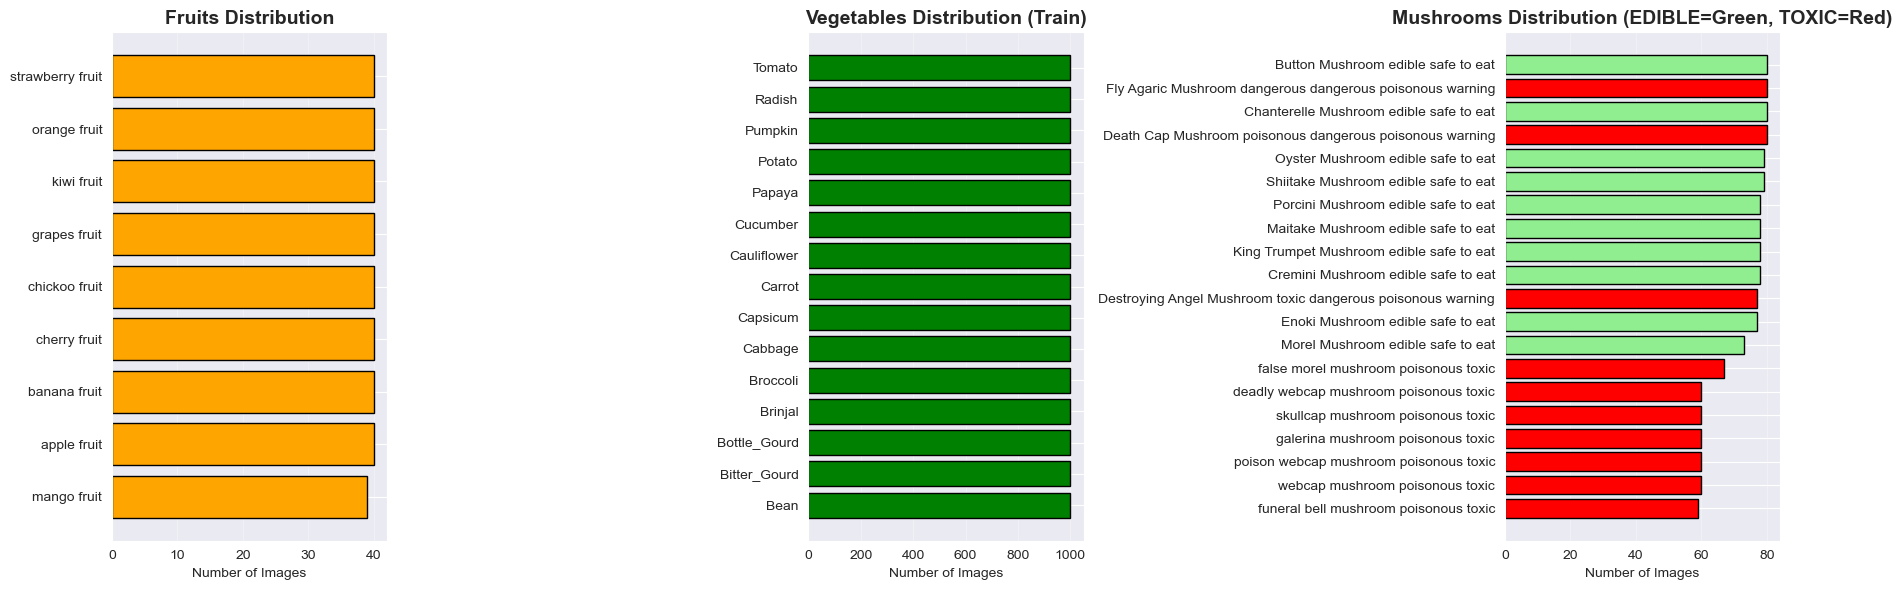

✅ Distribution charts created!


In [6]:
# Create comparison charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Fruits distribution
if len(df_fruits) > 0:
    df_fruits_sorted = df_fruits.sort_values('count', ascending=True)
    axes[0].barh(df_fruits_sorted['class'], df_fruits_sorted['count'], color='orange', edgecolor='black')
    axes[0].set_title('Fruits Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Number of Images')
    axes[0].grid(axis='x', alpha=0.3)

# Vegetables (from train split)
veg_train_path = vegetables_dir / 'train'
if veg_train_path.exists():
    veg_classes = sorted([d for d in os.listdir(veg_train_path) if (veg_train_path / d).is_dir()])
    veg_counts = []
    for vc in veg_classes:
        img_count = len([f for f in os.listdir(veg_train_path / vc) 
                        if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        veg_counts.append(img_count)
    
    veg_df = pd.DataFrame({'class': veg_classes, 'count': veg_counts})
    veg_df_sorted = veg_df.sort_values('count', ascending=True)
    axes[1].barh(veg_df_sorted['class'], veg_df_sorted['count'], color='green', edgecolor='black')
    axes[1].set_title('Vegetables Distribution (Train)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Number of Images')
    axes[1].grid(axis='x', alpha=0.3)

# Mushrooms (EDIBLE vs TOXIC)
if len(mushroom_data) > 0:
    mushroom_df = pd.DataFrame(mushroom_data)
    mushroom_df_sorted = mushroom_df.sort_values('count', ascending=True)
    colors = ['red' if t == 'toxic' else 'lightgreen' for t in mushroom_df_sorted['type']]
    axes[2].barh(mushroom_df_sorted['class'], mushroom_df_sorted['count'], color=colors, edgecolor='black')
    axes[2].set_title('Mushrooms Distribution (EDIBLE=Green, TOXIC=Red)', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Number of Images')
    axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Distribution charts created!")

ANALYZE IMAGE DIMENSIONS 

In [7]:
print("\n" + "="*80)
print("📊 IMAGE DIMENSION ANALYSIS")
print("="*80)

all_stats = []

# Fruits
for fruit_class in os.listdir(fruits_dir):
    class_path = fruits_dir / fruit_class
    if not class_path.is_dir():
        continue
    
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                img_path = class_path / img_file
                img = Image.open(img_path)
                all_stats.append({
                    'category': 'Fruits',
                    'class': fruit_class,
                    'width': img.size[0],
                    'height': img.size[1],
                    'format': img.format
                })
            except:
                pass

# Vegetables (sample from train)
veg_train_path = vegetables_dir / 'train'
if veg_train_path.exists():
    for veg_class in os.listdir(veg_train_path):
        class_path = veg_train_path / veg_class
        if not class_path.is_dir():
            continue
        
        # Sample first 20 images
        img_files = [f for f in os.listdir(class_path) 
                    if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:20]
        
        for img_file in img_files:
            try:
                img_path = class_path / img_file
                img = Image.open(img_path)
                all_stats.append({
                    'category': 'Vegetables',
                    'class': veg_class,
                    'width': img.size[0],
                    'height': img.size[1],
                    'format': img.format
                })
            except:
                pass

# Mushrooms (sample from both)
for safety_type in ['EDIBLE', 'TOXIC']:
    safety_path = mushrooms_dir / safety_type if (mushrooms_dir / safety_type).exists() else mushrooms_dir / safety_type.lower()
    
    if safety_path.exists():
        for mushroom_class in os.listdir(safety_path):
            class_path = safety_path / mushroom_class
            if not class_path.is_dir():
                continue
            
            # Sample first 20 images
            img_files = [f for f in os.listdir(class_path) 
                        if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:20]
            
            for img_file in img_files:
                try:
                    img_path = class_path / img_file
                    img = Image.open(img_path)
                    all_stats.append({
                        'category': f'Mushrooms_{safety_type}',
                        'class': mushroom_class,
                        'width': img.size[0],
                        'height': img.size[1],
                        'format': img.format
                    })
                except:
                    pass

# Create DataFrame
df_stats = pd.DataFrame(all_stats)

print(f"\nTotal images sampled: {len(df_stats)}")
print(f"\n📐 WIDTH Statistics:")
print(f"  Min:  {df_stats['width'].min()}px")
print(f"  Max:  {df_stats['width'].max()}px")
print(f"  Mean: {df_stats['width'].mean():.0f}px")
print(f"  Std:  {df_stats['width'].std():.0f}px")

print(f"\n📐 HEIGHT Statistics:")
print(f"  Min:  {df_stats['height'].min()}px")
print(f"  Max:  {df_stats['height'].max()}px")
print(f"  Mean: {df_stats['height'].mean():.0f}px")
print(f"  Std:  {df_stats['height'].std():.0f}px")

print(f"\n📋 Image Formats: {list(df_stats['format'].unique())}")

print(f"\n📊 Per-Category Statistics:")
print(df_stats.groupby('category').agg({
    'width': ['min', 'mean', 'max'],
    'height': ['min', 'mean', 'max']
}).round(0))



📊 IMAGE DIMENSION ANALYSIS

Total images sampled: 1059

📐 WIDTH Statistics:
  Min:  150px
  Max:  6134px
  Mean: 1043px
  Std:  955px

📐 HEIGHT Statistics:
  Min:  150px
  Max:  4742px
  Mean: 823px
  Std:  691px

📋 Image Formats: ['JPEG', 'PNG', 'WEBP']

📊 Per-Category Statistics:
                 width               height              
                   min    mean   max    min    mean   max
category                                                 
Fruits             183  1621.0  6134    167  1238.0  4742
Mushrooms_EDIBLE   325  1208.0  5472    240   910.0  3648
Mushrooms_TOXIC    150  1070.0  2048    150   887.0  2560
Vegetables         224   224.0   224    224   224.0   224


VISUALIZE IMAGE DIMENSIONS 

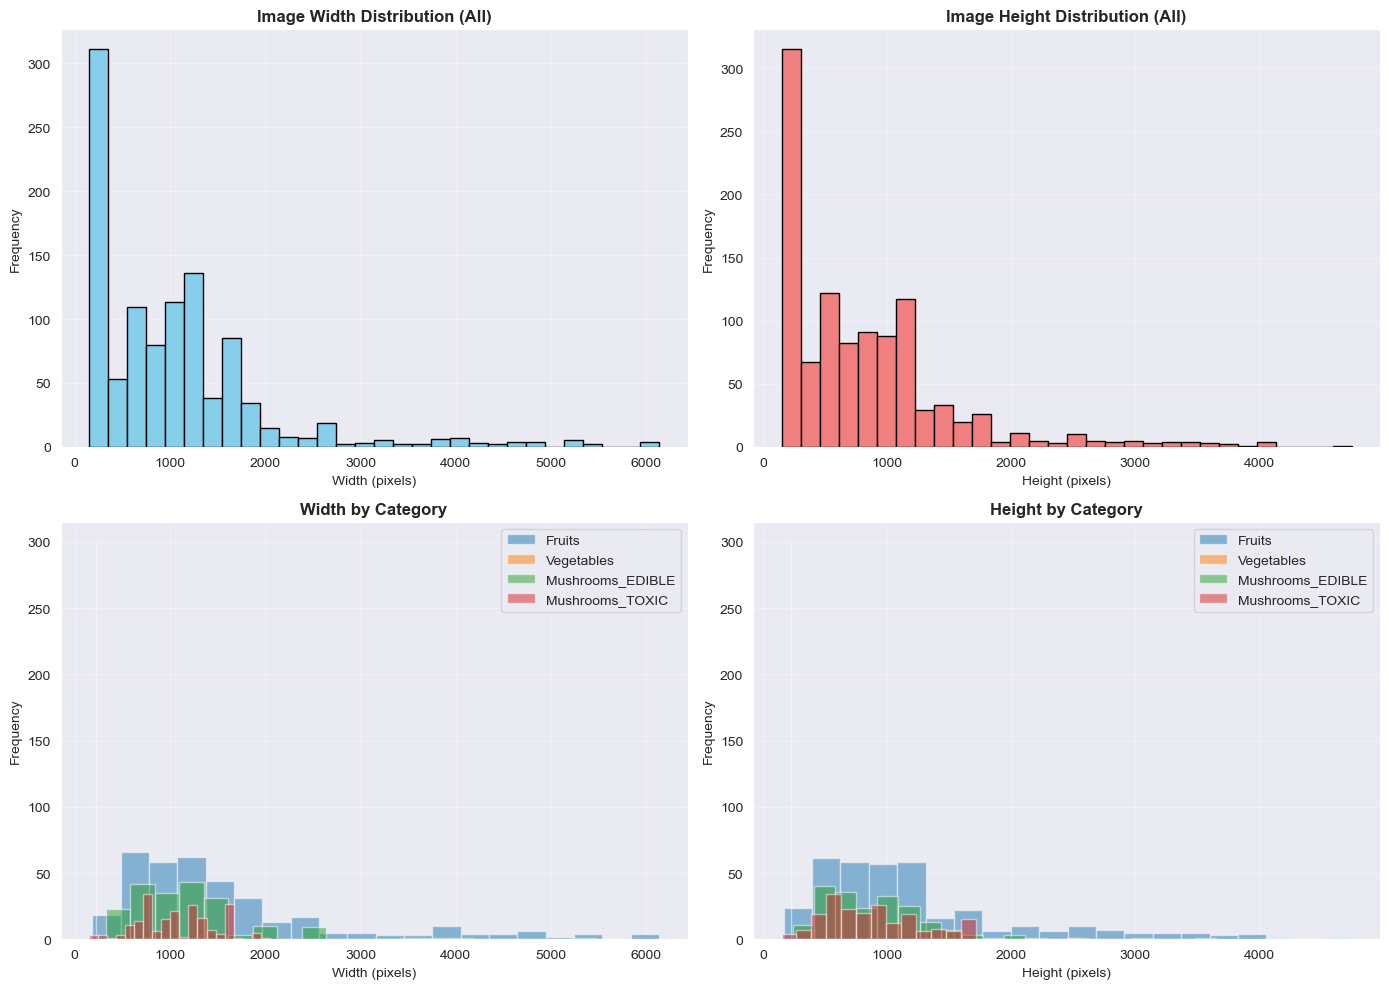

✅ Dimension distribution charts created!


In [8]:
# Create histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Overall width distribution
axes[0, 0].hist(df_stats['width'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Image Width Distribution (All)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# Overall height distribution
axes[0, 1].hist(df_stats['height'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Image Height Distribution (All)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Height (pixels)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# Per-category widths
for category in df_stats['category'].unique():
    width_data = df_stats[df_stats['category'] == category]['width']
    if len(width_data) > 0:
        axes[1, 0].hist(width_data, bins=20, alpha=0.5, label=category)
axes[1, 0].set_title('Width by Category', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Width (pixels)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Per-category heights
for category in df_stats['category'].unique():
    height_data = df_stats[df_stats['category'] == category]['height']
    if len(height_data) > 0:
        axes[1, 1].hist(height_data, bins=20, alpha=0.5, label=category)
axes[1, 1].set_title('Height by Category', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Height (pixels)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Dimension distribution charts created!")


DISPLAY SAMPLE IMAGES

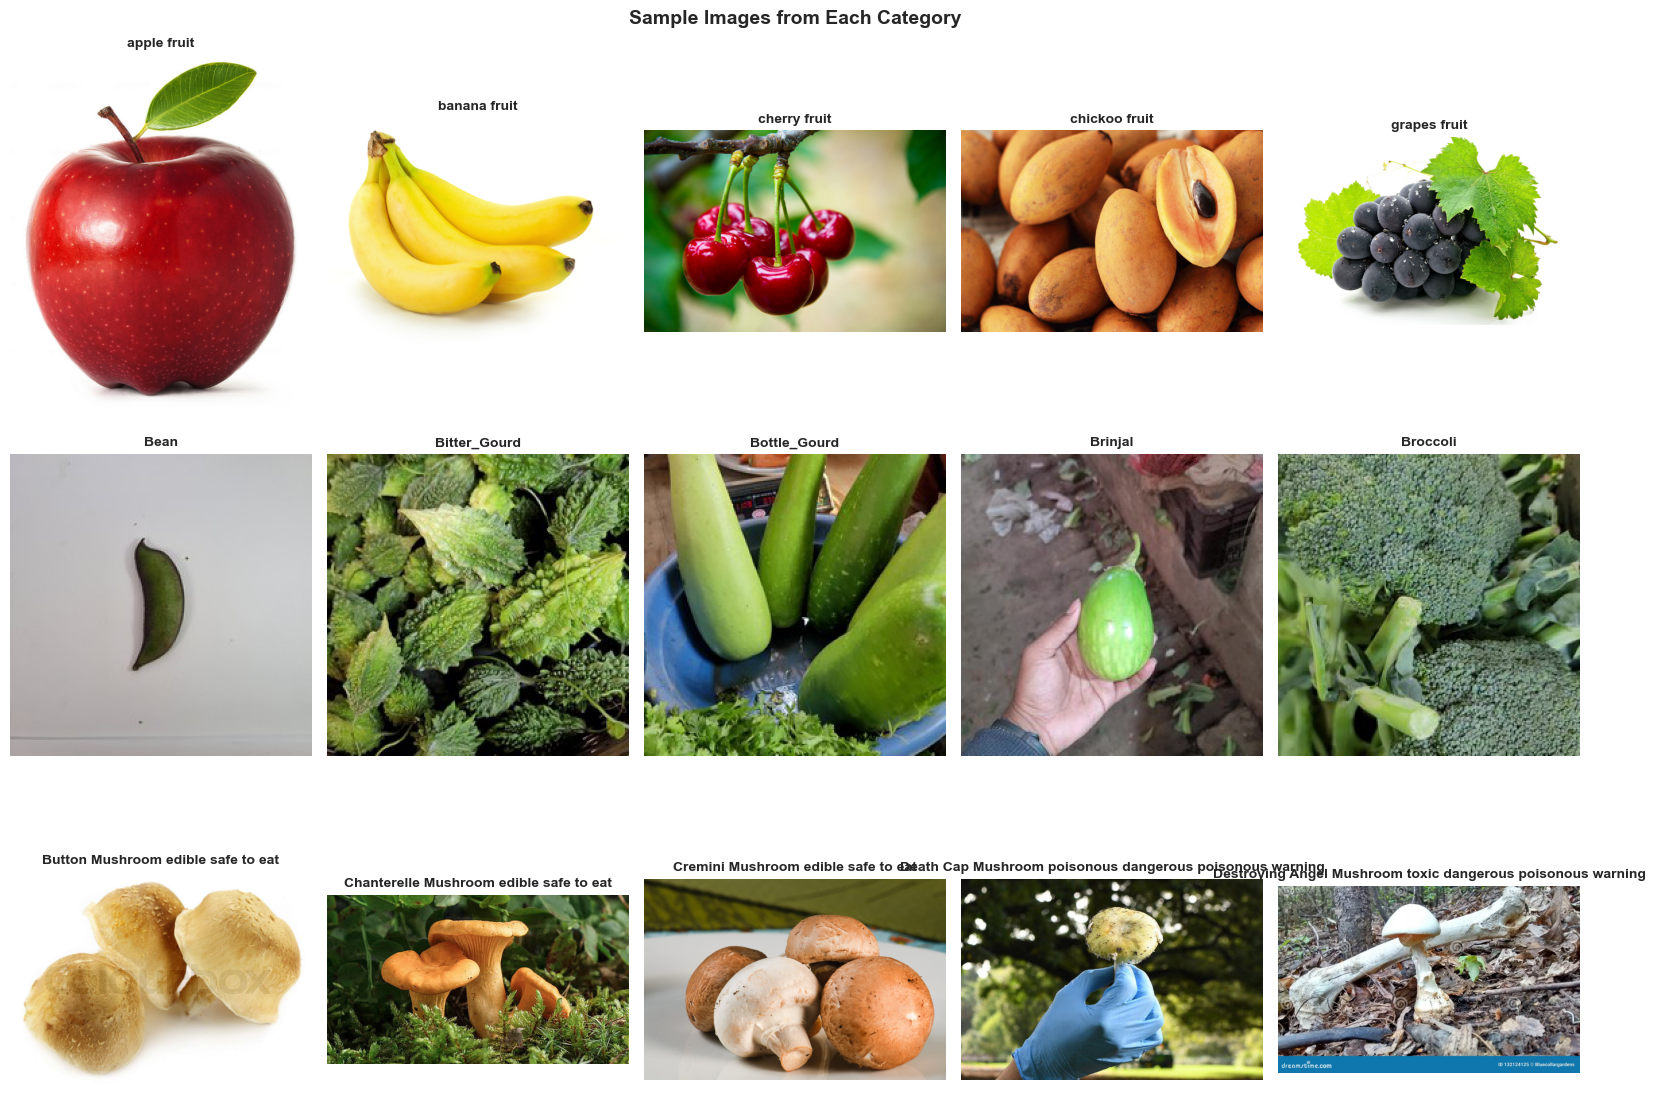

✅ Sample images displayed!


In [9]:
# Display sample images from each category
fig, axes = plt.subplots(3, 5, figsize=(16, 12))

# Fruits samples (top row)
fruit_list = sorted([d for d in os.listdir(fruits_dir) if (fruits_dir / d).is_dir()])[:5]
for idx, fruit in enumerate(fruit_list):
    fruit_path = fruits_dir / fruit
    img_files = [f for f in os.listdir(fruit_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if img_files:
        img_path = fruit_path / img_files[0]
        try:
            img = Image.open(img_path)
            axes[0, idx].imshow(img)
            axes[0, idx].set_title(f"{fruit}", fontsize=10, fontweight='bold')
        except:
            axes[0, idx].text(0.5, 0.5, 'Error', ha='center', va='center')
    
    axes[0, idx].axis('off')

# Vegetables samples (middle row)
veg_train_path = vegetables_dir / 'train'
if veg_train_path.exists():
    veg_list = sorted([d for d in os.listdir(veg_train_path) if (veg_train_path / d).is_dir()])[:5]
    for idx, veg in enumerate(veg_list):
        veg_path = veg_train_path / veg
        img_files = [f for f in os.listdir(veg_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        if img_files:
            img_path = veg_path / img_files[0]
            try:
                img = Image.open(img_path)
                axes[1, idx].imshow(img)
                axes[1, idx].set_title(f"{veg}", fontsize=10, fontweight='bold')
            except:
                axes[1, idx].text(0.5, 0.5, 'Error', ha='center', va='center')
        
        axes[1, idx].axis('off')

# Mushrooms samples (bottom row - mix of edible and toxic)
mushroom_samples = []
for safety_type in ['EDIBLE', 'TOXIC']:
    safety_path = mushrooms_dir / safety_type if (mushrooms_dir / safety_type).exists() else mushrooms_dir / safety_type.lower()
    
    if safety_path.exists():
        for mushroom in sorted(os.listdir(safety_path))[:3]:
            mushroom_path = safety_path / mushroom
            if (mushroom_path).is_dir():
                mushroom_samples.append((mushroom, mushroom_path))

for idx, (mushroom, mushroom_path) in enumerate(mushroom_samples[:5]):
    img_files = [f for f in os.listdir(mushroom_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if img_files:
        img_path = mushroom_path / img_files[0]
        try:
            img = Image.open(img_path)
            axes[2, idx].imshow(img)
            axes[2, idx].set_title(f"{mushroom}", fontsize=10, fontweight='bold')
        except:
            axes[2, idx].text(0.5, 0.5, 'Error', ha='center', va='center')
    
    axes[2, idx].axis('off')

plt.suptitle('Sample Images from Each Category', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Sample images displayed!")


CREATE COMPREHENSIVE CLASS MAPPING

In [19]:
print("\n" + "="*80)
print("📋 CREATING CLASS MAPPING")
print("="*80)

# Collect all classes
all_classes = []
class_index = 0

# Fruits classes
for fruit in sorted(os.listdir(fruits_dir)):
    if (fruits_dir / fruit).is_dir():
        all_classes.append({
            'index': class_index,
            'name': fruit,
            'category': 'Fruit',
            'safety': None
        })
        class_index += 1

# Vegetables classes
veg_train_path = vegetables_dir / 'train'
if veg_train_path.exists():
    for veg in sorted(os.listdir(veg_train_path)):
        if (veg_train_path / veg).is_dir():
            all_classes.append({
                'index': class_index,
                'name': veg,
                'category': 'Vegetable',
                'safety': None
            })
            class_index += 1

# Edible mushrooms
edible_path = mushrooms_dir / 'EDIBLE' if (mushrooms_dir / 'EDIBLE').exists() else mushrooms_dir / 'edible'
if edible_path.exists():
    for mushroom in sorted(os.listdir(edible_path)):
        if (edible_path / mushroom).is_dir():
            all_classes.append({
                'index': class_index,
                'name': mushroom,
                'category': 'Mushroom',
                'safety': 'EDIBLE'
            })
            class_index += 1

# Toxic mushrooms
toxic_path = mushrooms_dir / 'TOXIC' if (mushrooms_dir / 'TOXIC').exists() else mushrooms_dir / 'toxic'
if toxic_path.exists():
    for mushroom in sorted(os.listdir(toxic_path)):
        if (toxic_path / mushroom).is_dir():
            all_classes.append({
                'index': class_index,
                'name': mushroom,
                'category': 'Mushroom',
                'safety': 'TOXIC'
            })
            class_index += 1

# Create mappings
class_to_index = {c['name']: c['index'] for c in all_classes}
index_to_class = {str(c['index']): c['name'] for c in all_classes}

class_mapping = {
    'class_to_index': class_to_index,
    'index_to_class': index_to_class,
    'class_details': all_classes,
    'num_classes': len(all_classes),
    'categories': {
        'Fruit': len([c for c in all_classes if c['category'] == 'Fruit']),
        'Vegetable': len([c for c in all_classes if c['category'] == 'Vegetable']),
        'Mushroom': len([c for c in all_classes if c['category'] == 'Mushroom'])
    },
    'mushroom_safety': {
        'EDIBLE': len([c for c in all_classes if c['safety'] == 'EDIBLE']),
        'TOXIC': len([c for c in all_classes if c['safety'] == 'TOXIC'])
    }
}

print(f"✅ Class Mapping Created")
print(f"Total classes: {len(all_classes)}\n")

for c in all_classes[:10]:  # Show first 10
    safety_str = f" [{c['safety']}]" if c['safety'] else ""
    print(f"  {c['index']:2d} → {c['name']:40s} ({c['category']:10s}){safety_str}")

if len(all_classes) > 10:
    print(f"  ... and {len(all_classes) - 10} more")

# Save mapping
with open('C:/Users/USER/fruit_veg_mushroom_identifier/data/class_mapping.json', 'w') as f:
    json.dump(class_mapping, f, indent=2)




📋 CREATING CLASS MAPPING
✅ Class Mapping Created
Total classes: 44

   0 → apple fruit                              (Fruit     )
   1 → banana fruit                             (Fruit     )
   2 → cherry fruit                             (Fruit     )
   3 → chickoo fruit                            (Fruit     )
   4 → grapes fruit                             (Fruit     )
   5 → kiwi fruit                               (Fruit     )
   6 → mango fruit                              (Fruit     )
   7 → orange fruit                             (Fruit     )
   8 → strawberry fruit                         (Fruit     )
   9 → Bean                                     (Vegetable )
  ... and 34 more


SAVE COMPREHENSIVE DATASET SUMMARY

In [20]:
print("\n" + "="*80)
print("📊 SAVING DATASET SUMMARY")
print("="*80)

# Function to convert numpy/pandas types to Python native types
def convert_types(obj):
    """Convert numpy/pandas types to Python native types"""
    if hasattr(obj, 'tolist'):
        return obj.tolist()
    elif isinstance(obj, (np.integer, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64)):
        return float(obj)
    elif isinstance(obj, dict):
        return {k: convert_types(v) for k, v in obj.items()}
    elif isinstance(obj, (list, tuple)):
        return [convert_types(item) for item in obj]
    return obj

# Compile complete information
dataset_summary = {
    'dataset_name': 'Fruit, Vegetable & Mushroom Recognition Dataset',
    'created_date': pd.Timestamp.now().isoformat(),
    'total_images': 22802,
    'total_classes': 44,
    'categories': {
        'Fruits': {
            'images': int(df_fruits['count'].sum()) if len(df_fruits) > 0 else 359,
            'classes': int(len(df_fruits)) if len(df_fruits) > 0 else 9,
            'classes_list': df_fruits['class'].tolist() if len(df_fruits) > 0 else []
        },
        'Vegetables': {
            'images': 21000,
            'classes': 15,
            'structure': 'train/validation/test splits (70/15/15)',
            'train_images': 15000,
            'validation_images': 3000,
            'test_images': 3000
        },
        'Mushrooms': {
            'images': 1443,
            'classes': 20,
            'edible': {
                'images': 780,
                'classes': 10
            },
            'toxic': {
                'images': 663,
                'classes': 10,
                'warning': 'Educational purposes - Safety critical'
            }
        }
    },
    'image_dimensions': {
        'width': {
            'min': int(df_stats['width'].min()) if len(df_stats) > 0 else None,
            'max': int(df_stats['width'].max()) if len(df_stats) > 0 else None,
            'mean': round(float(df_stats['width'].mean()), 2) if len(df_stats) > 0 else None,
            'std': round(float(df_stats['width'].std()), 2) if len(df_stats) > 0 else None
        },
        'height': {
            'min': int(df_stats['height'].min()) if len(df_stats) > 0 else None,
            'max': int(df_stats['height'].max()) if len(df_stats) > 0 else None,
            'mean': round(float(df_stats['height'].mean()), 2) if len(df_stats) > 0 else None,
            'std': round(float(df_stats['height'].std()), 2) if len(df_stats) > 0 else None
        }
    },
    'image_formats': list(df_stats['format'].unique()) if len(df_stats) > 0 else [],
    'next_steps': [
        '✅ Week 1 Complete: Dataset Preparation',
        '📓 Week 2: Model Training (EfficientNetB0)',
        '📓 Week 3: API Development',
        '📓 Week 4: Website Frontend',
        '📓 Week 5: Quiz & Recipes',
        '📓 Week 6: Full Integration & Deployment'
    ]
}

# Convert all types to JSON-serializable format
dataset_summary = convert_types(dataset_summary)

# Save summary
with open('C:/Users/USER/fruit_veg_mushroom_identifier/data/dataset_summary.json', 'w') as f:
    json.dump(dataset_summary, f, indent=2)

print("📊 Dataset Summary:")
print(json.dumps(dataset_summary, indent=2))

print(f"\n✅ Saved to: {output_dir}/dataset_summary.json")
print("✅ JSON file created successfully!")



📊 SAVING DATASET SUMMARY
📊 Dataset Summary:
{
  "dataset_name": "Fruit, Vegetable & Mushroom Recognition Dataset",
  "created_date": "2025-11-30T20:18:48.676459",
  "total_images": 22802,
  "total_classes": 44,
  "categories": {
    "Fruits": {
      "images": 359,
      "classes": 9,
      "classes_list": [
        "apple fruit",
        "banana fruit",
        "cherry fruit",
        "chickoo fruit",
        "grapes fruit",
        "kiwi fruit",
        "mango fruit",
        "orange fruit",
        "strawberry fruit"
      ]
    },
    "Vegetables": {
      "images": 21000,
      "classes": 15,
      "structure": "train/validation/test splits (70/15/15)",
      "train_images": 15000,
      "validation_images": 3000,
      "test_images": 3000
    },
    "Mushrooms": {
      "images": 1443,
      "classes": 20,
      "edible": {
        "images": 780,
        "classes": 10
      },
      "toxic": {
        "images": 663,
        "classes": 10,
        "warning": "Educational purposes